# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****


*Include your work on the following in this notebook and submit to your Github account.*

**A. Do you agree with the above analysis and recommendations? Why or why not?**

As a practical matter, the client is not specified in this analysis.  I am assuming that the client is the Center for Medicare and Medicaid Services (CMS).  That assumption drives a the primary assumption in solving this problem: driving down readmissions across the entire system will drive down overall costs.  This seems to be a reasonable assumption, and is likely supported by data not provided for this analysis.
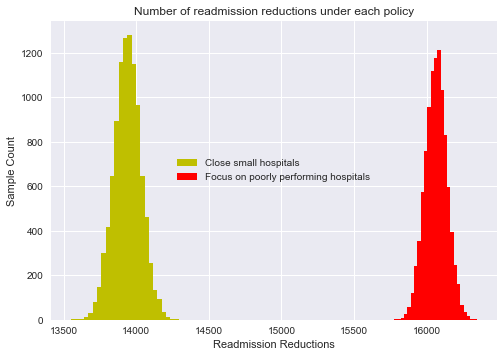
Given those two assumptions, the analysis as presented does not support the conclusions.  There is less than a 10% confidence that the small hospital mean excess readmission ratio is actually larger than that of the large hospitals. At a 99% confidence level, the mean difference in readmission ratios ranges from -0.3 (which would mean that the small hospitals are actually better than the large hospitals) to 0.4 (which would indicate that the policy would be effective.)

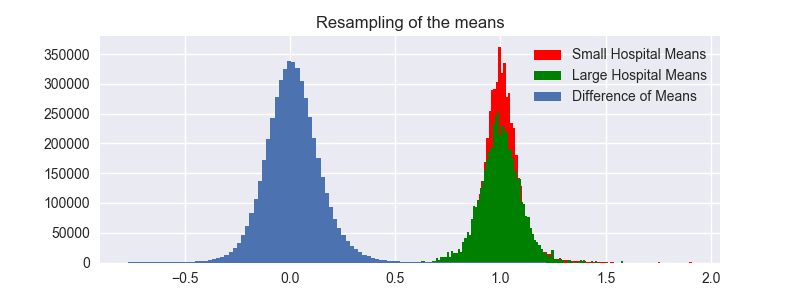

Additionally, even if the the conclusion was statistically true, it is neither pragmatic nor economical to implement as presented.  The main problem arises from the focus on small hospitals.  Small hospitals have by definition have both a small number of patients and a proportionately small number of readmissions.  The following chart clearly shows that the policy as proposed focuses on a small section of the target population, and effectively caps the expected return on effort.  What is not clear from the analytical plots is the social cost.

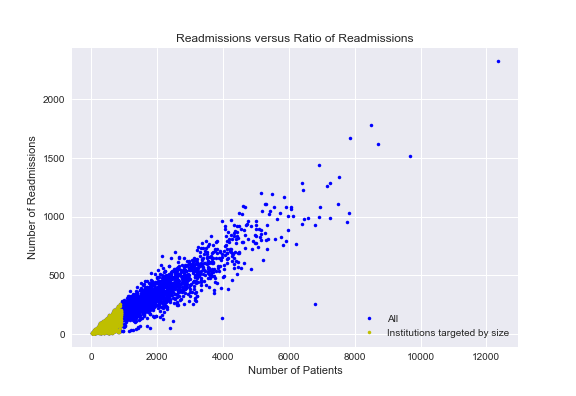

For example, implementing this policy would leave the state of Alaska with a single hospital, and add significant travel challenges for patients and their families in the midwest where smaller hospitals account for a larger share of patient population and the density of hospitals per sq. mile is much lower. Maps showing both rough patient density and the importance that smaller hospitals play regionally are shown below.

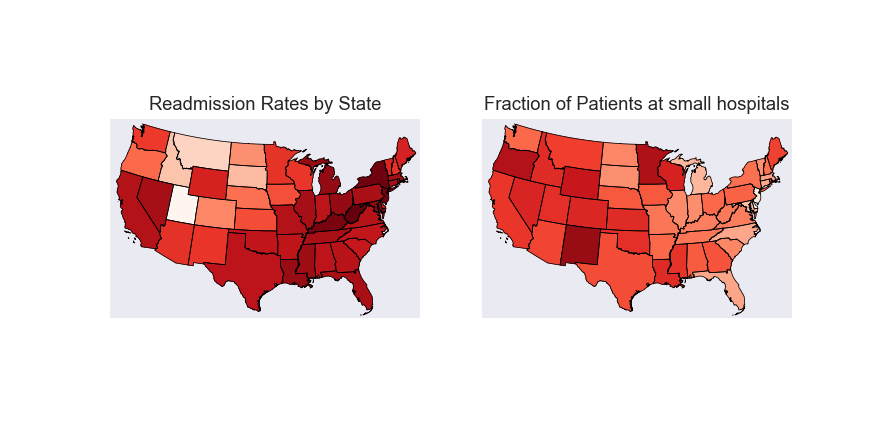



The problem arises because the metric chosen to measure the efficiency of a particular hospital (comparing a hospital's readmission rates to similar hospitals) is excellent for measuring individual hospital performance, but is ineffective in terms of setting policy designed to reduce the overall number of hospital readmissions which is the driver of overall CMS cost. 

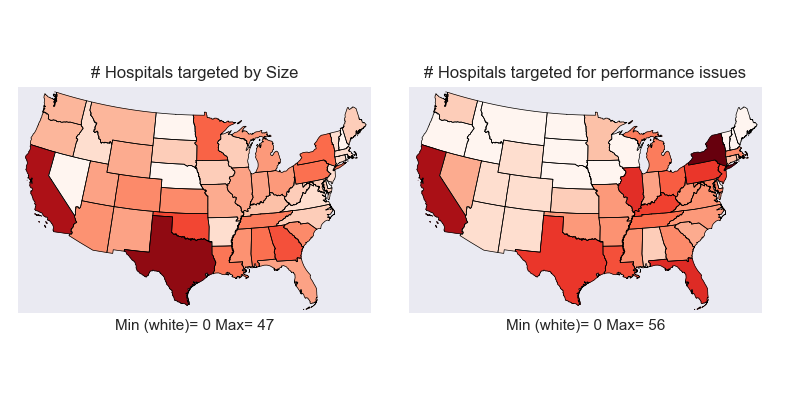

The flaw in the thinking is apparent when looking at the maps above (code included lower in this analysis.)  The recomendation given would focus resources on the smallest part of the problem, namely, smaller hospitals with lower numbers of patients, and consequently, lower numbers of readmissions.  Rough calculations and simulations both show that this policy would reduce the number of readmissions by slightly more than 14,000 or approximately 1.9%.

However, given the social expense that would be incurred, this policy does not offer a significant return.  In addition to the social costs described above, there is no indication on what the excess patient capaciy is at the larger hospitals, or whether it could absorb the increase from patients displaced by the closing of smaller hospitals, particularly in the midwest.

A more practical strategy would be to focus on improving all all hospitals that had higher than average overall readmittance rates.  

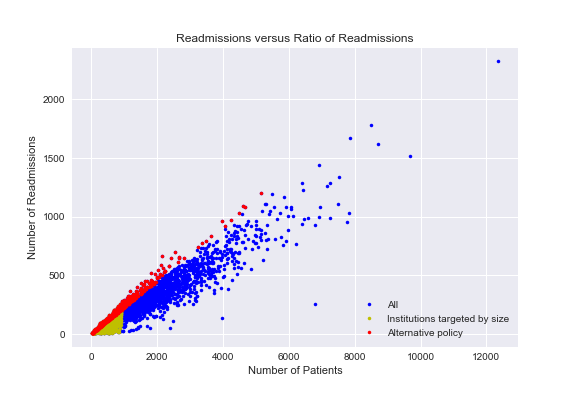

Calculations are shown below, but with a 99% level of confidence, such a policy would yield an improvement of of 16,000 or 2.2%.  Though not appreciably higher than the results the current proposal will achieve, it has two practical advantages.  

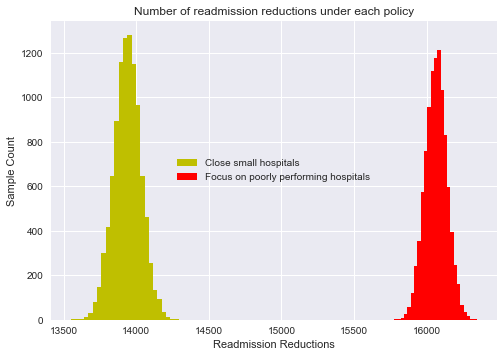

First, as the fourth map clearly shows, the burden on improvement moves to states that have both higher readmittance rates and higher levels of hospital infrastructure, easing social and capacity burdens.  Equally as important, rather than a single action that will yield small results (1.9%), this policy could be implemented on an annual basis implementing best practices and utilizing standard process improvement techniques, and continually improving the system readmission rate for a number of years.


B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

Null Hypotheseis: Null hypothesis: Reassigning all patients from small hospitals to large would result in a lower overall readmission ratio.  

The mean for the small hospitals excess ratio is 1.14, the mean for the large hospitals is .99.  Resampling both distriburtions and comparing the difference to zero (with postive values indicating improvement) gives a p-value is on the order of .46 indicating that the null hypothesis can be rejected.  

Shown below are calculations indicating that there is a 99% confidence level that the difference mean excess readmission  that the mean ratio for small hospitals lies between -0.3 and 0.4.  Finally, to specifcally address the last question: the main issue with the chart presented is that it is used to drive policy, and while insightful, does not address the specific metric that would drive client success.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import time
import scipy.stats as stats
import statsmodels


In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')


****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Bill\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
h_df=clean_hospital_read_df
h_df = h_df.drop('Footnote', 1)
t3=h_df.dropna()
np.random.seed(42)

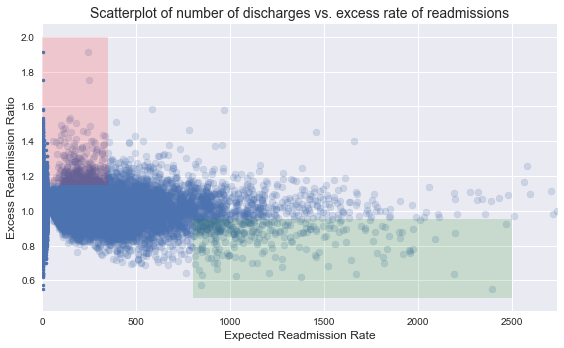

In [6]:
#plt.plot(h_df["Expected Readmission Rate"],h_df["Number of Readmissions"],marker='.',linestyle='none')

plt.plot(h_df["Expected Readmission Rate"],h_df["Excess Readmission Ratio"],marker='.',linestyle='none')
plt.xlabel("Expected Readmission Rate")
plt.ylabel("Excess Readmission Ratio")
plt.show()

# Step 1:  Visually Analyze the data

In [7]:
small_hos=t3.loc[t3.loc[:,"Number of Discharges"]<300,:]
large_hos=t3.loc[t3.loc[:,"Number of Discharges"]>=300,:]

print "Means:",small_hos["Excess Readmission Ratio"].mean(),large_hos["Excess Readmission Ratio"].mean()
print "Standard Deviation",small_hos["Excess Readmission Ratio"].values.std(),large_hos["Excess Readmission Ratio"].values.std()

results=stats.ttest_ind(small_hos["Excess Readmission Ratio"],large_hos["Excess Readmission Ratio"])
print results





Means: 1.01423821218 0.999870848024
Standard Deviation 0.082471456515 0.101108876138
Ttest_indResult(statistic=8.384446244560591, pvalue=5.6895380893335379e-17)


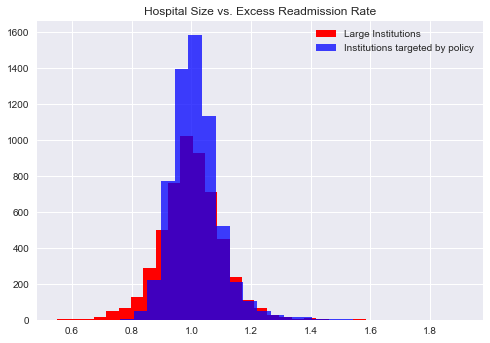

Mean ratio for All institutions is: 1.008
Mean ratio for Large institutions is: 1.000
Mean ratio for Small institutions is: 1.014


In [131]:
h_df=clean_hospital_read_df
h_df = h_df.drop('Footnote', 1)
t3=h_df.dropna()
np.random.seed(42)

plt.hist(t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Excess Readmission Ratio"],color='r',alpha=1.0,bins=25,label="Large Institutions")
plt.hist(t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Excess Readmission Ratio"],color='blue',alpha=0.75,bins=25,label="Institutions targeted by policy")
plt.legend(loc="upper right")
plt.title("Hospital Size vs. Excess Readmission Rate")
plt.show()


mean_ratio_all=t3.loc[:,"Excess Readmission Ratio"].mean()
mean_ratio_large=t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Excess Readmission Ratio"].mean()
mean_ratio_small=t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Excess Readmission Ratio"].mean()

print "Mean ratio for All institutions is: %5.3f"% mean_ratio_all
print "Mean ratio for Large institutions is: %5.3f"% mean_ratio_large
print "Mean ratio for Small institutions is: %5.3f"% mean_ratio_small

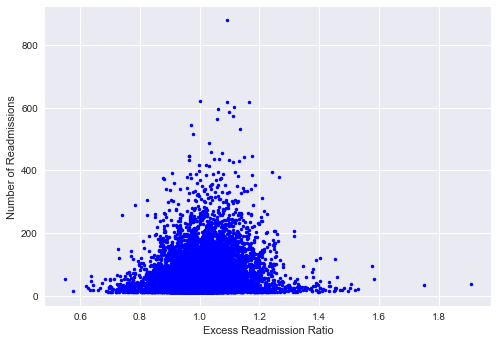

In [67]:
plt.plot(h_df["Excess Readmission Ratio"],h_df["Number of Readmissions"],marker='.',linestyle='none',color='b')
plt.xlabel("Excess Readmission Ratio")
plt.ylabel("Number of Readmissions")
plt.show()

 

The chart below shows that visually, the distributions of the mean Ratios of Readmission are likely close to each other, and this is confirmed by calculation.  Calculations also show that he impact of including the smaller institutions moves the overall mean by a very small amount, further calling into question the effectiveness of the proposed policy.

To statistically check the effectiveness of the policy, a series of permutation samples were run, and the meansfor that sample were calculated and compared to the actual data.  That work follows.

Starting time (local): 18:12:53
Patients at small hospitals 1,035,353
Patients at large hospitals 3,166,412
Null hypothesis is that the mean readmission ratio at large hospitals is smaller than at small hospitals.

Large Means equal 0.999870848024
Small hospitals ratio mean equals 1.01423821218 



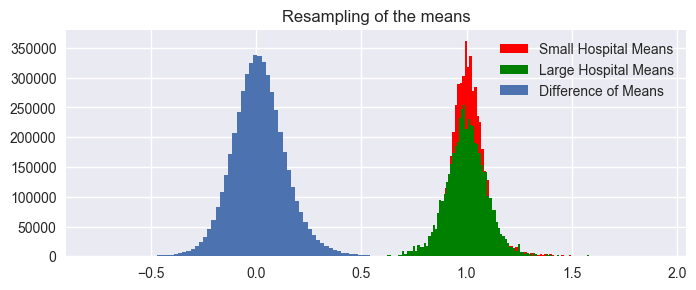

After resampling both distributions 5,000,000 times, 

the mean difference in small and large readmission ratios is  0.01436470072 and the p-value is 0.464146
so the null hypothesis is rejected.

We can say with 99.0 percent confidence that the difference in means lies between -0.341 and 0.420.
Ending time (local): 18:12:55
Elapsed time= 0 min 2 secs


In [124]:
t=get_start_time()

def permutation_samples(data,sizea):
    '''Accept an np array with data, as well as the size of the first slice, 
    randomly rearrange it, and slice into two smaller slices, return both slices'''
    resample=np.random.permutation(data)
    slicea=resample[:sizea]
    sliceb=resample[sizea:]
    return slicea,sliceb

all_hos_ratios=t3.loc[:,"Excess Readmission Ratio"]
small_hos_ratios=t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Excess Readmission Ratio"]
large_hos_ratios=t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Excess Readmission Ratio"]

small_patients=t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Number of Discharges"].sum()
large_patients=t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Number of Discharges"].sum()

print "Patients at small hospitals", '{:,}'.format(small_patients)
print "Patients at large hospitals", '{:,}'.format(large_patients)

num_small_hos=len(small_hos_ratios)
num_sample_runs=100000

small_sample,large_sample=permutation_samples(all_hos_ratios,num_small_hos)

small_means=np.empty(num_sample_runs)
large_means=np.empty(num_sample_runs)


print "Null hypothesis is that the mean readmission ratio at large hospitals is smaller than at small hospitals."
print "\nLarge Means equal",np.mean(large_hos_ratios)
print "Small hospitals ratio mean equals",np.mean(small_hos_ratios),"\n"

number_means_trials=5000000
shoes=number_means_trials   
small_sample1=np.empty(shoes)
large_sample1=np.empty(shoes)
means_diff=np.empty(shoes)
 
small_sample1=np.random.choice(small_hos_ratios,shoes,replace=True)
large_sample1=np.random.choice(large_hos_ratios,shoes,replace=True)   
means_diff=small_sample1-large_sample1

plt.close()
plt.figure(dpi=100,figsize=(8,3))
plt.hist(small_sample1,bins=100,color='r',label="Small Hospital Means")
plt.hist(large_sample1,bins=100,color='g',label="Large Hospital Means")
plt.hist(means_diff,bins=100,label="Difference of Means")
plt.legend(loc="best")

plt.title("Resampling of the means")
plt.savefig("C:\\Users\\Bill\\Desktop\\Springboard\\Means_of_Small_and_Large.png")

plt.show()
plt.close()

pvalue=np.sum(means_diff<0)/float(number_means_trials)

print "After resampling both distributions",'{:,}'.format(number_means_trials),"times, \n"
print "the mean difference in small and large readmission ratios is ",np.mean(means_diff),"and the p-value is",pvalue
rejected=(pvalue>0.05)
if rejected:
    print "so the null hypothesis is rejected.\n"
else:
    print "and the null hypothesis is accepted.\n"
    
confidence_level=0.01 #0.1= 99% confidence level
half=(confidence_level/2.0)*100
interval_range=np.percentile(means_diff,[0+half,100-half])
con=(1-confidence_level)*100
print "We can say with %4.1f percent confidence that the difference in means lies between %4.3f and %4.3f."%(con,interval_range[0],interval_range[1])

e=get_elapsed_time(t)


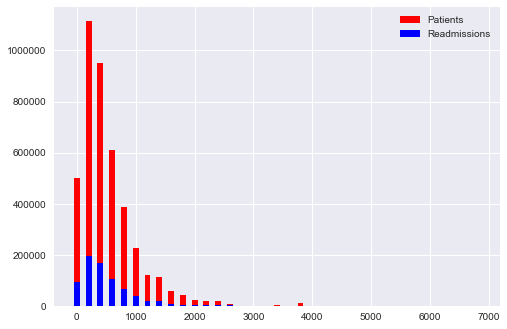

In [17]:
# Run only once

h_df=clean_hospital_read_df.copy()
h_df = h_df.drop('Footnote', 1)
h_df=h_df.dropna()
t=h_df.copy()

#t['err_bucket']=t["Predicted Readmission Rate"].apply(lambda x : int(x*1)/1)
t['disc_bucket']=t["Number of Discharges"].apply(lambda x : int(x/200)*200)

num_disc=list(set(t['disc_bucket']))
num_disc.sort()

max_disc=int(max(t["Number of Discharges"]))
num_disc[len(num_disc)-1]=max_disc

total_disc=np.empty(len(num_disc))
total_read=np.empty(len(num_disc))

for j in range(len(num_disc)-1):
    total_disc[j]=t.loc[(t.loc[:,"Number of Discharges"]>num_disc[j])&(t.loc[:,"Number of Discharges"]<=num_disc[j+1]),"Number of Discharges"].sum()
    total_read[j]=t.loc[(t.loc[:,"Number of Discharges"]>num_disc[j])&(t.loc[:,"Number of Discharges"]<=num_disc[j+1]),"Number of Readmissions"].sum()   


bars=[]

bars2=[]
for i in total_read:
    bars.append(int(i))
    
for i in total_disc:
    bars2.append(int(i))


plt.close()
plt.bar(num_disc,bars2,width=100,color='r',label="Patients")
plt.bar(num_disc,bars,width=100,color='b',label="Readmissions")
plt.legend(loc="best")
#plt.xticks(rotation=45)
plt.show()


In [18]:
small_patients=t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Number of Discharges"].sum()
large_patients=t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Number of Discharges"].sum()
print "small patients:",small_patients,"large patients",large_patients

tmp=t3.loc[(t3.loc[:,"Number of Discharges"]<300)&(t3.loc[:,"Excess Readmission Ratio"]>1.0),"Number of Discharges"].sum()
print "small patients at hospitals with >1.0 ratio",tmp

small patients: 1035353 large patients 3166412
small patients at hospitals with >1.0 ratio 542711


In [19]:
# Run only once
def reset_t3():
    h_df=clean_hospital_read_df
    h_df = h_df.drop('Footnote', 1)
    t3=h_df.dropna()
    return

reset_t3()

print "Large Hospital Excess Rate:",t3.loc[(t3.loc[:,"Number of Discharges"]>=300),"Excess Readmission Ratio"].mean()
print "Small Hospital Excess Rate:",t3.loc[(t3.loc[:,"Number of Discharges"]<300),"Excess Readmission Ratio"].mean()

Large Hospital Excess Rate: 0.999870848024
Small Hospital Excess Rate: 1.01423821218


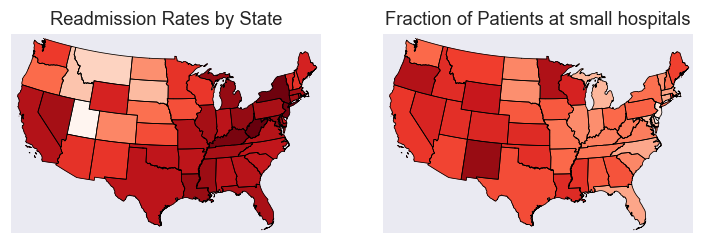

In [64]:
#from example
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
# draw state boundaries.
# data from U.S Census Bureau
# http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('C:\\Users\\Bill\st99_d00','states',drawbounds=True)

state_list=list(set(t3.State))
state_list.sort()

plt.close()
states = {
        'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
        'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
        'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
        'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
        'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina',
        'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands',
        'VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'
}

state_discharges=[]
state_readmits=[]
state_rate=[]
state_rate_dict={}
state_small_size_list=[]
state_small_size_dict={}
state_small_count_dict={}
state_large_count_dict={}
state_small_count=[]
state_large_count=[]

for st in state_list:
    state_d=int(t3.loc[t3.State==st,"Number of Discharges"].sum())
    state_discharges.append(state_d)
    state_r=int(t3.loc[t3.State==st,"Number of Readmissions"].sum())
    state_readmits.append(state_r)
    state_rate.append(float(state_r)/state_d)
    sname=states[st]
    #state_rate_dict[sname]=float(state_r)/state_d
    state_rate_dict[st]=float(state_r)/state_d
    
    state_small_hos=t3.loc[(t3.State==st)&(t3.loc[:,"Number of Discharges"]<300),"Hospital Name"].count()
    state_small_count.append(state_small_hos)
    state_small_count_dict[sname]=state_small_hos
    state_large_hos=t3.loc[(t3.State==st)&(t3.loc[:,"Number of Discharges"]>=300),"Hospital Name"].count()
    state_large_count.append(state_large_hos)
    state_large_count_dict[sname]=state_large_hos
    state_small_large=float(state_small_hos)/(state_small_hos+state_large_hos)
    state_small_size_list.append(float(state_small_hos)/(state_small_hos+state_large_hos))
    state_small_size_dict[sname]=float(state_small_hos)/(state_small_hos+state_large_hos)

plt.close()
fig = plt.figure(num=None, figsize=(8, 4), dpi=110, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(1,2,1)   
    
map_min=min(state_rate)
map_max=max(state_rate)
map_dict=state_rate_dict

print 
title="Readmission Rates by State"
ax1=make_a_map(map_min, map_max, map_dict, title, map_colors='Reds_r')
plt.grid(True)
#plt.title('Readmission Rates by State')
plt.legend(loc="lower left")
#plt.show()

print ' '
#  Fraction of Patients at small hospitals.  

map_dict={}
state_d=[]
state_discharges=[]

for st in state_list:
    state_d=int(t3.loc[(t3.State==st),"Number of Discharges"].sum())
    state_d_large=int(t3.loc[(t3.State==st)&(t3.loc[:,"Number of Discharges"]>=300),"Number of Discharges"].sum())
    state_d_small=int(t3.loc[(t3.State==st)&(t3.loc[:,"Number of Discharges"]<300),"Number of Discharges"].sum())
    state_discharges.append(float(state_d_small)/state_d)
    map_dict[st]=float(state_d_small)/state_d

ax2 = fig.add_subplot(1,2,2)     
map_min=min(state_discharges)
map_max=max(state_discharges)
title="Fraction of Patients at small hospitals"

#ax2=generate_relative_map(map_min, map_max, map_dict, title, map_colors='Reds_r')
ax2=make_a_map(map_min, map_max, map_dict, title, map_colors='Reds_r')
plt.grid(True)


plt.savefig("C:\\Users\\Bill\\Desktop\\Springboard\\Reads_Pat_Fracs.png")
plt.show()
plt.close()

Starting time (local): 16:12:58


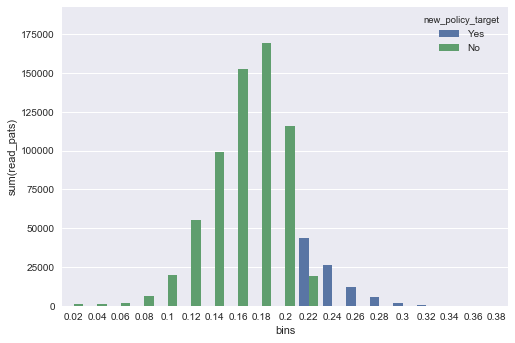

Ending time (local): 16:13:29
Elapsed time= 0 min 31 secs
0 min 31 secs


In [63]:
t=get_start_time()
plt.close()
hos_dict={}
inlist=[]
for i, row in t3.iterrows():
    if row["Hospital Name"] in inlist:
        continue
    hos_dict[row["Hospital Name"]]=row["State"]
    inlist.append(row["Hospital Name"])
#print hos_dict

hospital_ratings=pd.DataFrame()
hospital_names=t3["Hospital Name"].unique()
hospital_ratings["hos_name"]=hospital_names
for i in hospital_ratings.index:
    hn=hospital_ratings.loc[i,"hos_name"]
    hospital_ratings.loc[i,"tot_pats"]=t3.loc[t3.loc[:,"Hospital Name"]==hn,"Number of Discharges"].sum()
    hospital_ratings.loc[i,"read_pats"]=t3.loc[t3.loc[:,"Hospital Name"]==hn,"Number of Readmissions"].sum()
    hospital_ratings.loc[i,"state"]=hos_dict[hn]
    hospital_ratings.loc[i,"excess_max"]=t3.loc[t3.loc[:,"Hospital Name"]==hn,"Excess Readmission Ratio"].max()
    hospital_ratings.loc[i,"excess_mean"]=t3.loc[t3.loc[:,"Hospital Name"]==hn,"Excess Readmission Ratio"].mean()
    hospital_ratings.loc[i,"excess_min"]=t3.loc[t3.loc[:,"Hospital Name"]==hn,"Excess Readmission Ratio"].min()
    
hospital_ratings["excess_diff"]=hospital_ratings["excess_max"]-hospital_ratings["excess_min"]
hospital_ratings["tot_rating"]=hospital_ratings.read_pats/hospital_ratings.tot_pats
hospital_ratings["bins"]=hospital_ratings.tot_rating.apply(lambda x: int(x*50)/50.0)

hospital_ratings.sort_values("tot_rating",ascending=False,inplace=True)
hospital_ratings["new_policy_target"]=hospital_ratings.tot_rating.apply(lambda x: "Yes" if x> hospital_ratings.bins.median()*1.25 else "No")

#Plot readmission rates against number of readmissions.  Determine which areas would be most impacted.

sns.barplot(x="bins", y="read_pats", hue="new_policy_target", data=hospital_ratings,estimator =sum,errwidth=0.0)
plt.show()
              
target=hospital_ratings.loc[(hospital_ratings.new_policy_target=="Yes"),"read_pats"].sum()
total=hospital_ratings.loc[:,"read_pats"].sum()


print get_elapsed_time(t)

Starting time (local): 00:41:04


Previously Proposed policy recomended reassigning the 1042553 patients at small hospitals to larger hospitals.
Small hospitals accounted for 192005 readmissions and large hospitals accounted for 539592 readmissions prior to the policy change
Which was  0.3 percent of the total readmissions across the nation.
Total Patients Readmitted: 731597


New Policy Excess Readmission Target Rate: 0.225
Patients at hospitals below target policy cutoff: 4024626.0
Total Patients 4201765
Total Patients Readmitted: 731597
Target policy population 177139.0 Target Percentage: 0.0421582358842


C:\Users\Bill\Anaconda2\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Number of trials is:  10000
##########


After 10000 trials, the estimated number of readmits under new policy: 717658
Comparing this to 731597 original readmits shows 13938 less readmits under the new policy, or  1.91 percent
##########


After 10000 trials, the estimated number of readmits under new policy: 715533
Comparing this to 731597 original readmits shows 16063 less readmits under the new policy, or  2.20 percent


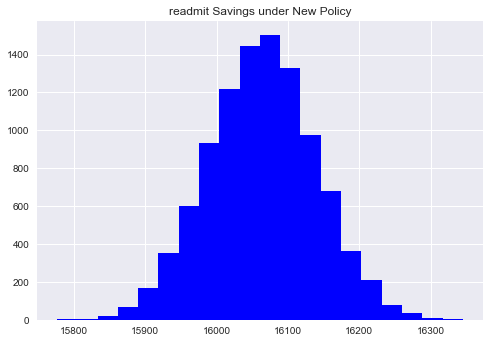

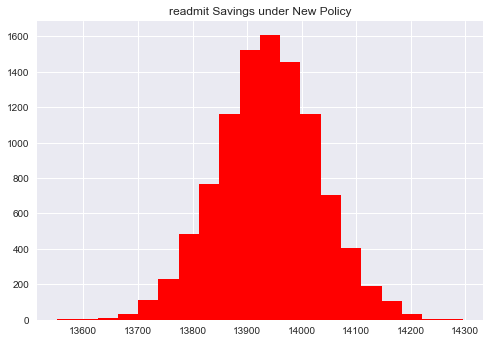


Ending time (local): 03:09:57
Elapsed time= 148 min 52 secs


In [132]:
# This code takes a very long time to run.  Consider making the number of test trials 100 to see code run.


#test level
#test_trials=100

#Actual analysis level
test_trials=10000

t=get_start_time()
total_pats=int(hospital_ratings.loc[:,"tot_pats"].sum())
read_pats=int(hospital_ratings.loc[:,"read_pats"].sum())

bad_rate=hospital_ratings.bins.median()*1.25
good_pats=hospital_ratings.loc[hospital_ratings.bins<bad_rate,"tot_pats"].sum()

large_hos=t3.loc[t3[:]["Number of Discharges"]>300,:]
large_pats=t3.loc[t3[:]["Number of Discharges"]>300,"Number of Discharges"].sum()
large_reads=t3.loc[t3[:]["Number of Discharges"]>300,"Number of Readmissions"].sum()


small_hos=t3.loc[t3[:]["Number of Discharges"]<=300,:]
small_pats=t3.loc[t3[:]["Number of Discharges"]<=300,"Number of Discharges"].sum()
small_reads=small_hos.loc[:,"Number of Readmissions"].sum()

print "\n\nPreviously Proposed policy recomended reassigning the %d patients at small hospitals to larger hospitals."%(small_pats)
print "Small hospitals accounted for %d readmissions and large hospitals accounted for %d readmissions prior to the policy change"% (small_reads,large_reads)
print "Which was %4.1f percent of the total readmissions across the nation."%(float(small_reads)/(small_reads+large_reads))
print "Total Patients Readmitted:",read_pats

print "\n\nNew Policy Excess Readmission Target Rate:",bad_rate
print "Patients at hospitals below target policy cutoff:",good_pats
print "Total Patients",total_pats
print "Total Patients Readmitted:",read_pats
print "Target policy population",total_pats-good_pats,"Target Percentage:",(1-good_pats/total_pats)

good_hos=hospital_ratings.loc[hospital_ratings.bins<bad_rate,:]
good_hos["reas_prob"]=good_hos["tot_pats"]/good_pats

#Size Proposal

hos_names=list(set(list(large_hos["Hospital Name"].values)))
hos_names.sort()

i=0
size_reads=np.empty(len(hos_names))
size_reads_prob=np.empty(len(hos_names))

for name in hos_names:    
    size_reads_prob[i]=(large_hos.loc[large_hos.loc[:,"Hospital Name"]==name,"Number of Readmissions"].sum())/(large_hos.loc[large_hos.loc[:,"Hospital Name"]==name,"Number of Discharges"].sum())
    size_reads[i]=float(large_hos.loc[large_hos.loc[:,"Hospital Name"]==name,"Number of Discharges"].sum())/large_pats
    i+=1
    
size_pol_trial=np.empty(test_trials)


#Performance Proposal
new_pol_trial=np.empty(test_trials)
new_reads_prob=good_hos["tot_rating"].values
new_reads=good_hos["reas_prob"].values

print "\nNumber of trials is: ",len(new_pol_trial)

for i in range(test_trials):
    new_trial=np.random.choice(new_reads_prob,size=total_pats,replace=True,p=new_reads)
    new_pol_trial[i]=np.sum(new_trial)
    
    size_trial=np.random.choice(size_reads_prob,size=total_pats,replace=True,p=size_reads)
    size_pol_trial[i]=np.sum(size_trial)#+large_reads

new_pol_savings=read_pats-new_pol_trial   
new_pol_readmits=np.mean(new_pol_trial)

size_pol_savings=read_pats-size_pol_trial
size_pol_readmits=np.mean(size_pol_trial)

print "##########"
print "\n\nAfter %d trials, the estimated number of readmits under new policy: %d" % (test_trials,size_pol_readmits)
print "Comparing this to %d original readmits shows %d less readmits under the new policy, or %5.2f percent" %(read_pats,int(read_pats-np.mean(size_pol_trial)),(1-np.mean(size_pol_trial)/read_pats)*100)
print "##########"


print "\n\nAfter %d trials, the estimated number of readmits under new policy: %d" % (test_trials,new_pol_readmits)
print "Comparing this to %d original readmits shows %d less readmits under the new policy, or %5.2f percent" %(read_pats,int(read_pats-np.mean(new_pol_trial)),(1-np.mean(new_pol_trial)/read_pats)*100)

plt.hist(new_pol_savings,bins=20,color="b")
plt.title("readmit Savings under New Policy")
plt.show()
plt.hist(size_pol_savings,bins=20,color="r")
plt.title("readmit Savings under New Policy")
plt.show()
print ''
#print good_hos.head(3)
e=get_elapsed_time(t)

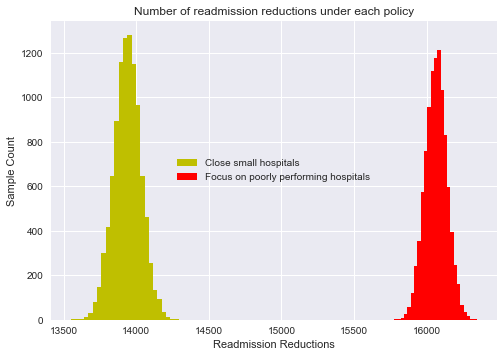

In [134]:
#  size_pol_savings and new_pol_savings are generated in the block above.

plt.hist(size_pol_savings,bins=25,color="y",label="Close small hospitals")
plt.hist(new_pol_savings,bins=25,color="r",label="Focus on poorly performing hospitals")
plt.legend(loc="center")
plt.xlabel("Readmission Reductions")
plt.ylabel("Sample Count")
#plt.axes().get_yaxis().set_ticks([])

plt.title("Number of readmission reductions under each policy")
plt.savefig("C:\\Users\\Bill\\Desktop\\Springboard\\Policy_Comparison_Plot.png")
plt.show()
print ' '

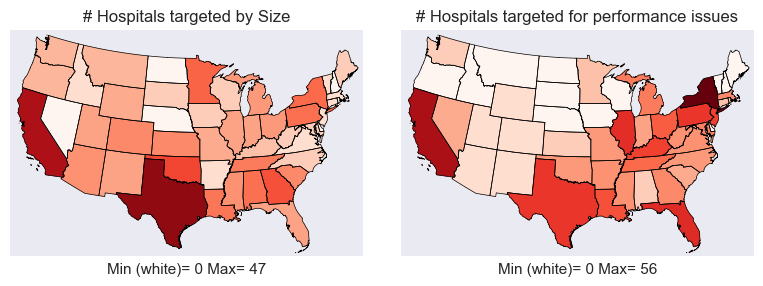

In [62]:
import matplotlib.gridspec as gridspec

#Plot Number of hospitals impacted by proposed policy by state.
map_dict={}
map_dict1={}
state_d=[]
state_discharges=[]
state_counts=[]

impacts=[]

map_dict2={}
tmp_dict={}
state_d=[]
state_discharges=[]

for st in state_list:
    #first plot calcs
    tmp=len(hospital_ratings.loc[(hospital_ratings["state"]==st)&(hospital_ratings["tot_pats"]<300),"hos_name"].unique())
    state_counts.append(tmp)
    
    #second plot calcs
    a=int(hospital_ratings.loc[((hospital_ratings.state==st)&(hospital_ratings.new_policy_target=="Yes")),["hos_name"]].count())
    b=int(hospital_ratings.loc[(hospital_ratings.state==st),"hos_name"].count())
    state_d=float(a)/b
    state_discharges.append(a)
    tmp_dict[st]=a    
    
    impacts.append(tmp)
    impacts.append(a)
    

max_state_impact=max(impacts)
map_min=0.0
map_max=1.0


for i in range(len(state_counts)):
    map_dict[state_list[i]]=float(state_counts[i])/max_state_impact
    map_dict2[state_list[i]]=tmp_dict[state_list[i]]
    
fig = plt.figure(num=None, figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k')

ax1 = fig.add_subplot(1,2,1)    

title="# Hospitals targeted by Size"
ax1=make_a_map(map_min, map_max, map_dict, title, map_colors='Reds_r')
title_str="Min (white)= " + str(min(state_counts)) + " Max= " + str(max(state_counts))
plt.xlabel(title_str)
plt.grid(True)

ax2 = fig.add_subplot(122)
    
map_min=min(state_discharges)
map_max=max(state_discharges)
title="# Hospitals targeted for performance issues"

ax2=make_a_map(map_min, map_max, map_dict2, title, map_colors='Reds_r')
title_str="Min (white)= " + str(map_min) + " Max= " + str(map_max)
plt.xlabel(title_str)
plt.grid(True)

plt.tight_layout()
plt.savefig("C:\\Users\\Bill\\Desktop\\Springboard\\State_Comparison_Map.png")
plt.show()

In [92]:
reset_t3()
providers=[]


for i in t3.loc[:,"Provider Number"]:
    providers.append(i)
    
unique_providers=list(set(providers))
print "Total Hospitals",len(unique_providers)

hospital_columns=["state","name","provider_number","discharges","readmissions","read_rate"]
hos_group=pd.DataFrame(columns=hospital_columns)

for i in unique_providers:
    tmp=t3.loc[t3.loc[:,"Provider Number"]==i]
    hos_group.loc[i,"state"]=tmp.loc[tmp.index[0],"State"]
    hos_group.loc[i,"name"]=tmp.loc[tmp.index[0],"Hospital Name"]
    hos_group.loc[i,"provider_number"]=tmp.loc[tmp.index[0],"Provider Number"]
    hos_group.loc[i,"discharges"]=tmp.loc[:,"Number of Discharges"].sum()
    hos_group.loc[i,"readmissions"]=tmp.loc[:,"Number of Readmissions"].sum()
    
hos_group["read_rate"]=hos_group["readmissions"]/hos_group["discharges"]


Total Hospitals 2993


In [93]:
print "Total Discharges=",hos_group.loc[:,"discharges"].sum()
print "Total Small Hospital Discharges=",hos_group.loc[hos_group.discharges<900,"discharges"].sum()
print "Total Large Hospital Discharges=",hos_group.loc[hos_group.discharges>=900,"discharges"].sum()

print "\nTotal Readmissions=",hos_group.loc[:,"readmissions"].sum()
print "Total Small Hospital Readmissions=",hos_group.loc[hos_group.discharges<900,"readmissions"].sum()
print "Total Large Hospital Readmissions=",hos_group.loc[hos_group.discharges>=900,"readmissions"].sum()

print "\nTotal Readmissions Rate=",hos_group.loc[:,"readmissions"].sum()/hos_group.loc[:,"discharges"].sum()
print "Total Small Hospital Readmissions Rate=",hos_group.loc[hos_group.discharges<900,"readmissions"].sum()/hos_group.loc[hos_group.discharges<900,"discharges"].sum()
print "Total Large Hospital Readmissions=",hos_group.loc[hos_group.discharges>=900,"readmissions"].sum()/hos_group.loc[hos_group.discharges>=900,"discharges"].sum()

Total Discharges= 4201765
Total Small Hospital Discharges= 629856
Total Large Hospital Discharges= 3571909

Total Readmissions= 731597.0
Total Small Hospital Readmissions= 116926.0
Total Large Hospital Readmissions= 614671.0

Total Readmissions Rate= 0.17411659148
Total Small Hospital Readmissions Rate= 0.185639257227
Total Large Hospital Readmissions= 0.172084731162


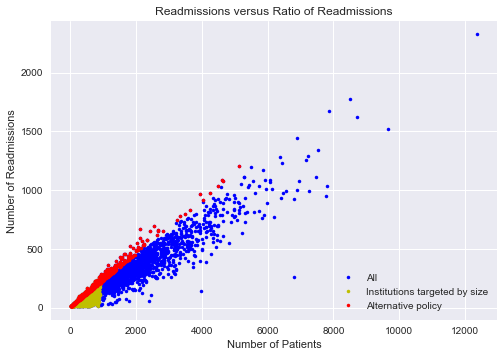

In [130]:

np.random.seed(42)

small_hos_reads=hos_group.loc[(hos_group.loc[:,"discharges"]<900),:]
large_hos_ratios=hos_group.loc[(hos_group.loc[:,"discharges"]>=900),:]
plt.close()
plt.plot(hos_group["discharges"],hos_group["readmissions"],marker='.',linestyle='none',color='b',label="All")

plt.xlabel("Number of Patients")
plt.ylabel("Number of Readmissions")
plt.title("Readmissions versus Ratio of Readmissions")

tmp1=small_hos_reads.loc[small_hos_reads.loc[:,"discharges"]<900,:]
plt.plot(tmp1["discharges"],tmp1["readmissions"],marker='.',linestyle='none',color='y',label="Institutions targeted by size")
plt.legend(loc="upper right")

tmp2=hos_group.loc[hos_group.loc[:,"read_rate"]>0.225,:]
plt.plot(tmp2["discharges"],tmp2["readmissions"],marker='.',linestyle='none',color='r',label="Alternative policy")
plt.legend(loc="lower right")

plt.savefig("C:\\Users\\Bill\\Desktop\\Springboard\\read_rate2.png")

plt.show()

In [13]:
#run the following three cells first.

import time

def sec_min(seconds):
    min=int(seconds/60)
    if seconds>60:
        secs=int(seconds-min*60)
    else:
        secs=int(seconds)
    return str(min)+' min '+str(secs)+' secs'

def get_start_time():
    print "Starting time (local):",time.strftime("%H:%M:%S", time.localtime())
    return time.time()

def get_end_time():
    return time.time()

def get_elapsed_time(start):
    e=time.time()
    el=e-start
    print "Ending time (local):",time.strftime("%H:%M:%S", time.localtime())
    print "Elapsed time=",sec_min(el)
    return sec_min(el)
    
    

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

def make_a_map(min,max,state_mapping_dict,title,map_colors='Reds_r'):
    '''Accept max,min, states mapping which is a dictionary with state keys and map values as items,title and colors, 
    then draws a relative map.  Colors default to reds, with max values being dark'''

    map_min=float(min)
    map_max=float(max)

    # Look at states, define iterable of unique states, establish two letter dict
    #state_list=list(set(states_included))
    #state_list.sort()
    
    states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
        'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
        'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
        'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
        'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina',
        'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands',
        'VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}
    
    
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    shp_info = m.readshapefile('C:\\Users\\Bill\st99_d00','states',drawbounds=True)

    colors={}
    statenames=[]
  
    if map_colors=="Blues_r":
        cmap = plt.cm.Blues_r# hot # use 'hot' colormap
        
    else:
        cmap = plt.cm.Reds_r# hot # use 'hot' colormap

    vmin = map_min; vmax = map_max

    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = state_mapping_dict[states.keys()[states.values().index(statename)]]             ###statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap( 1.-np.sqrt((float(pop)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    plt.title(title)


    plt.legend(loc="lower left")
    ay=plt.gca()
    return ay
#    plt.show()
#    print "Minimum (light)=",vmin,"Maximum (dark)=",vmax


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

def generate_relative_map(min,max,state_mapping_dict,title,map_colors='Reds_r'):
    '''Accept max,min, states mapping which is a dictionary with state keys and map values as items,title and colors, 
    then draws a relative map.  Colors default to reds, with max values being dark'''

    map_min=float(min)
    map_max=float(max)

    # Look at states, define iterable of unique states, establish two letter dict
    #state_list=list(set(states_included))
    #state_list.sort()
    
    states = {'AK': 'Alaska','AL': 'Alabama','AR': 'Arkansas','AS': 'American Samoa','AZ': 'Arizona','CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut','DC': 'District of Columbia','DE': 'Delaware','FL': 'Florida','GA': 'Georgia',
        'GU': 'Guam','HI': 'Hawaii','IA': 'Iowa','ID': 'Idaho','IL': 'Illinois',
        'IN': 'Indiana','KS': 'Kansas','KY': 'Kentucky','LA': 'Louisiana',
        'MA': 'Massachusetts','MD': 'Maryland','ME': 'Maine','MI': 'Michigan',
        'MN': 'Minnesota','MO': 'Missouri','MP': 'Northern Mariana Islands','MS': 'Mississippi','MT': 'Montana',
        'NA': 'National','NC': 'North Carolina','ND': 'North Dakota','NE': 'Nebraska','NH': 'New Hampshire',
        'NJ': 'New Jersey','NM': 'New Mexico','NV': 'Nevada','NY': 'New York','OH': 'Ohio','OK': 'Oklahoma',
        'OR': 'Oregon','PA': 'Pennsylvania','PR': 'Puerto Rico','RI': 'Rhode Island','SC': 'South Carolina',
        'SD': 'South Dakota','TN': 'Tennessee','TX': 'Texas','UT': 'Utah','VA': 'Virginia','VI': 'Virgin Islands',
        'VT': 'Vermont','WA': 'Washington','WI': 'Wisconsin','WV': 'West Virginia','WY': 'Wyoming'}
    
    
    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
            projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
    # draw state boundaries.
    shp_info = m.readshapefile('C:\\Users\\Bill\st99_d00','states',drawbounds=True)

    colors={}
    statenames=[]
    cmap = plt.cm.Reds_r# hot # use 'hot' colormap
    vmin = map_min; vmax = map_max

    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = state_mapping_dict[states.keys()[states.values().index(statename)]]             ###statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap( 1.-np.sqrt((float(pop)-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)
    # cycle through state names, color each one.
    ax = plt.gca() # get current axes instance
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
            color = rgb2hex(colors[statenames[nshape]]) 
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)
    plt.title(title)


    plt.legend(loc="lower left")
    plt.show()
    print "Minimum (light)=",vmin,"Maximum (dark)=",vmax